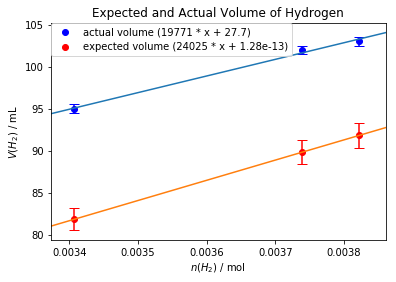

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

RFM_Mg = 24.31
conversion_Mg = 0.202 / 10  # g / cm

n = np.array([4.60, 4.10, 4.50]) * conversion_Mg / RFM_Mg  # mols of magnesium used in the reaction
T = 297.2  # in Kelvins
P = 102800  # in Pascals
R = 8.31  # J mol^-1 K^-1

# Volume of H2
actual = np.array([103.0, 95.0, 102.0])
# actual_average = np.mean(actual)
actual_slope, actual_intercept, _, _, _ = stats.linregress(n, actual)
expected = n * R * T / P * 1e6  # V = nRT/P gives volume in m^3 = 1 * 10^6 mL
# expected_average = np.mean(expected)
expected_slope, expected_intercept, _, _, _ = stats.linregress(n, expected)

plt.figure()
plt.scatter(n, actual, c='b')
plt.scatter(n, expected, c='r')
plt.errorbar(n, actual, yerr=0.5, linestyle="None", c='b', capsize=5)
plt.errorbar(n, expected, yerr=(0.05 / 4.40 + 0.1 / 27.2 + 1 / 1028) * expected, linestyle="None", c='r', capsize=5)
plt.xlim(.99 * min(n), 1.01 * max(n))
plt.xlabel("$n(H_2)$ / mol")
plt.ylabel("$V(H_2)$ / mL")
# n_average = np.mean(n)
# plt.scatter(n_average, actual_average)
# plt.scatter(n_average, expected_average)
plt.legend([
    f"actual volume ({int(round(actual_slope))} * x + {round(actual_intercept, 1)})", 
    f"expected volume ({int(round(expected_slope))} * x + {round(expected_intercept, 15)})",
], loc=2, borderaxespad=0.)
x = np.linspace(.99 * min(n), 1.01 * max(n))
plt.plot(x, actual_slope * x + actual_intercept)
plt.plot(x, expected_slope * x + expected_intercept)
plt.title("Expected and Actual Volume of Hydrogen");
